In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [58]:
sns.set_style(style='darkgrid')

### Problem Statement

Based on the features provided in our dataset, can we develop a classification model that will correctly predict whether a water sample is potable or not potable? 

### Feature Definitions

Below are brief descriptions of each feature in our data set and how it relates to the potability of water.

1. <b>pH</b> - pH is used to describe how acidic or alkaline a substance is and is measured by a scale of 0 (Strongly Acidic) to 14 (Strongly Alkaline). An acceptable pH range for drinking water is between 6.5 and 8.5 as recommended by the U.S EPA (Environmental Protection Agency).


2. <b>Hardness</b> - Hardness can be described as the concentration of dissolved minerals - usually calcium, magnesium carbonates, chlorides or sulphates - found in water. Hardness does not pose a health risk to humans. Below is a hard water identification scheme for hard water issued by the EPA.

    * Soft - (0 - 17.1ppm)
    * Slightly Hard - (17.1 - 60ppm)
    * Moderately Hard - (60 - 120ppm)
    * Hard - (120 - 18ppm)
    * Very Hard - (180 or more ppm)


3. <b>Solids</b> - TDS (Total dissolved solids) is the total organic and inorganic substances found in drinking water. It is measured by the levels of TDS (milligrams per litre) found in water and below is a grading system issued by the EPA.

    * Less than 300 - Excellent
    * 300 - 600 - Good
    * 600 - 900 - Fair
    * 900 - 1200 - Poor
    * Above 1200 - Unacceptable


4. <b>Chloramines</b> - Chloramines are used to disinfect drinking water. Based on the CDC (Centers for Disease Control and Prevention), a safe level of Chloramines in drinking water should not exceed 4 milligrams per liter(mg/L) or 4 parts per million (ppm).


5. <b>Sulfate</b> - Sulfates are naturally occurring substance in drinking water and a maximum contaminant level should not exceed 250 milligrams per liter (mg/L) for the sake of aesthetic effects (taste and odor).


6. <b>Conductivity</b> - This refers to the ability of water to conduct electricity. Not necessarily a risk to human health but does contribute to issues relating to water hardness and alkalinity. 


7. <b>Organic Carbon</b> - This is the measure of the amount of organic compounds found in a sample of water. 


8. <b>Trihalomethanes</b> - A group of chemicals that can contaminate drinking water. They normally form when chlorine is used as a disinfectant and reacts with organic matter. 


9. <b>Turbidity</b> - This is the degree to which water loses its transparency due to the presence of suspended particulates. The higher the turbidity, the murkier it seems. It is recommended that the turbidity of water shouldn't be more than 5 NTU (Nephelometric Turbidity Unit) and ideally under 1 NTU. 


10. <b>Potability</b> - This will be our target variable where 1 means 'Potable' and 0 means 'Not Potable'.

In [59]:
df = pd.read_csv('water_potability.csv')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
ph                 2785 non-null float64
Hardness           3276 non-null float64
Solids             3276 non-null float64
Chloramines        3276 non-null float64
Sulfate            2495 non-null float64
Conductivity       3276 non-null float64
Organic_carbon     3276 non-null float64
Trihalomethanes    3114 non-null float64
Turbidity          3276 non-null float64
Potability         3276 non-null int64
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [61]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


### Missing Values

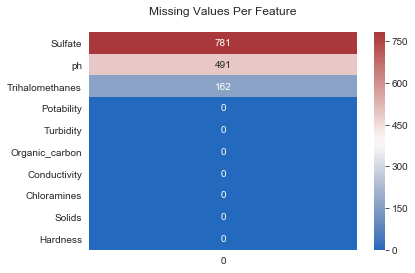

In [63]:
plt.title('Missing Values Per Feature\n')
nans = df.isnull().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag');

There are a number of missing values for Sulfate, pH and Trihalomethanes. Before we decide on an imputation method for the missing values, we will need to get a better sense of the distribution of these 3 features to see what statistic would be the best representation for these values. 

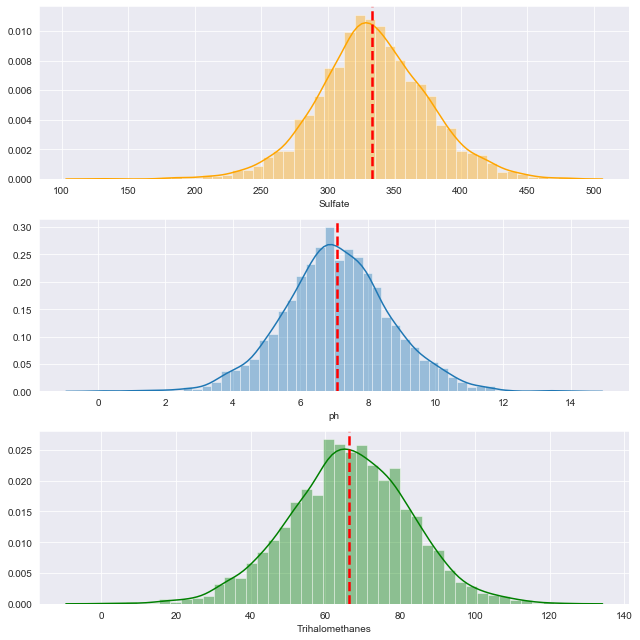

In [64]:
fig,axes = plt.subplots(3,figsize=(9,9))

sns.distplot(df['Sulfate'].dropna(),ax=axes[0],color='orange')
axes[0].axvline(x=df['Sulfate'].mean(),color='red',ls='--',lw=2.5);
sns.distplot(df['ph'].dropna(),ax=axes[1])
axes[1].axvline(x=df['ph'].mean(),color='red',ls='--',lw=2.5);
sns.distplot(df['Trihalomethanes'].dropna(),ax=axes[2],color='green')
axes[2].axvline(x=df['Trihalomethanes'].mean(),color='red',ls='--',lw=2.5);

plt.tight_layout()

Based on the plots above, the 3 features in question assume a normal distribution. Using the mean would be the best representation of our imputed missing values. 


To ensure accuracy of the imputed values, we will take the mean of both 'Potable' and 'Not Potable' values for each feature and impute accordingly respective of their Potability class.

In [65]:
#Sulfate Imputation

sulfate_mean_0 = df[df['Potability'] == 0]['Sulfate'].mean()
sulfate_mean_1 = df[df['Potability'] == 1]['Sulfate'].mean()
df.loc[df[(df['Sulfate'].isnull()) & (df['Potability'] == 0)].index,['Sulfate']] = sulfate_mean_0 
df.loc[df[(df['Sulfate'].isnull()) & (df['Potability'] == 1)].index,['Sulfate']] = sulfate_mean_1

#ph Imputation

ph_mean_0 = df[df['Potability'] == 0]['ph'].mean()
ph_mean_1 = df[df['Potability'] == 1]['ph'].mean()
df.loc[df[(df['ph'].isnull()) & (df['Potability'] == 0)].index,['ph']] = ph_mean_0 
df.loc[df[(df['ph'].isnull()) & (df['Potability'] == 1)].index,['ph']] = ph_mean_1

#Trihalomethanes Imputation

tri_mean_0 = df[df['Potability'] == 0]['Trihalomethanes'].mean()
tri_mean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean()
df.loc[df[(df['Trihalomethanes'].isnull()) & (df['Potability'] == 0)].index,['Trihalomethanes']] = tri_mean_0 
df.loc[df[(df['Trihalomethanes'].isnull()) & (df['Potability'] == 1)].index,['Trihalomethanes']] = tri_mean_1

In [66]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

With our missing values handled we are now ready to begin our EDA.

## EDA

Let's explore the distribution of our data. We will begin with our target variable ("Potability") and move on to our remaining features. 

In [67]:
labels = df.groupby('Potability')['Potability'].count().rename(index={0: 'Not Potable',1:'Potable'}).index
y = df.groupby('Potability')['Potability'].count().rename(index={0: 'Not Potable',1:'Potable'}).values

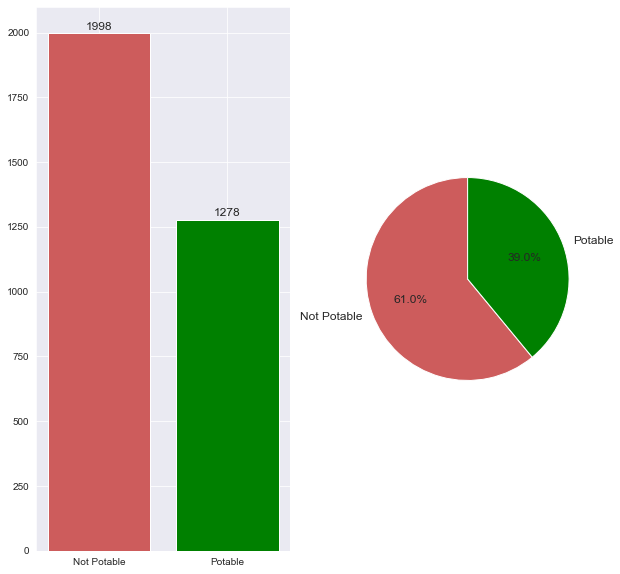

In [68]:
fig,ax = plt.subplots(1,2,figsize=(10,10))
colors = ('indianred','green')

ax[0].bar(x=labels[0],height=y[0],color='indianred')
ax[0].bar(x=labels[1],height=y[1],color='green')

for bar in ax[0].patches:
    ax[0].annotate(s = str(round(bar.get_height(),2)),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()+1),
                  ha='center', 
                  va='center',
                  size=12,
                  xytext=(0, 6),
                  textcoords='offset points')

ax[1].pie(y,labels=labels,autopct= '%1.1f%%',startangle=90,colors=colors,textprops={'fontsize': 12});

Our data is unbalanced with respect to the proportion of 'Potable' vs 'Not Potable' water samples. This will likely affect the performance of our predictive models. To mitigate any bias, we will make use of SMOTE (Synthetic Minority Oversampling Technique) later in our analysis to balance our data before training our models. 

Lets now take a look at the distribution of our remaining features split by our target label.

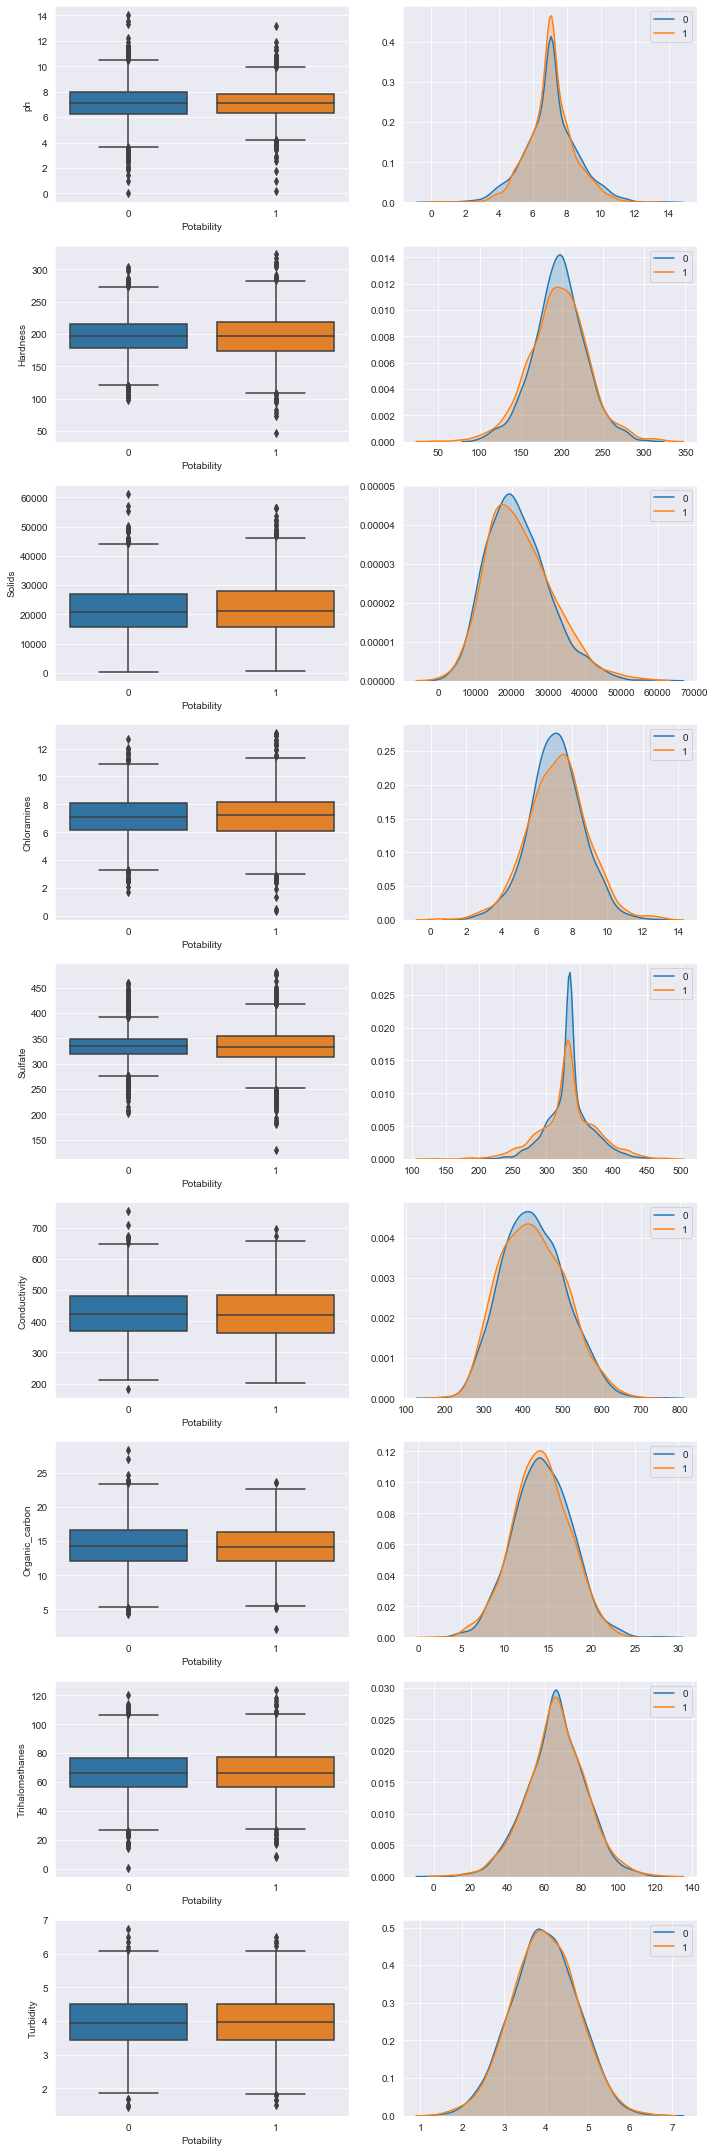

In [69]:
fig,ax = plt.subplots(9,2,figsize = (10,30))
x = 'Potability'
row = 0
col = 1

for column in df.columns[0:9]:
    sns.boxplot(x,y=column,data=df,ax=ax[row,0])
    sns.kdeplot(data=df[df['Potability'] == 0][column],label='0',shade=True,ax=ax[row,col])
    sns.kdeplot(data=df[df['Potability'] == 1][column],label='1',shade=True,ax=ax[row,col])
    row += 1
    
plt.tight_layout()

There appears to be minimal variance between the means of our target varible amongst each of the features.

Had the mean drastically differed between Potability classes in any of our features, it would be an indication that a feature is more prevalent in one Potability class versus the other.

To truly test for any sighnificant difference between 'Potable' and 'Not Potable' water samples amongst each of the features, it is worthwhile to make use of statistical testing.

### Statistical Testing

<b> H0 (Null Hypothesis) </b>: Mean for both 'Potable' and 'Not Potable' amongst feature are the same.

<b> H1 (Alternative Hypothesis) </b>: Mean for both 'Potable' and 'Not Potable' amongst feature are sighnificantly different.

<b> Sighnificance Level </b> - 90%

<b> Alpha </b> - 0.10% (any p-value less than this we will deem as statistically sighnificant)



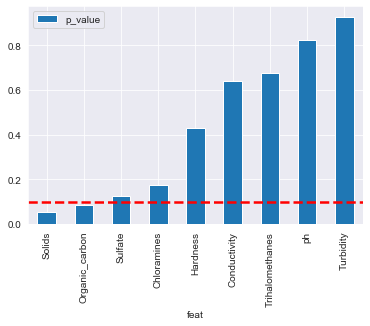

In [70]:
p_values = []
features = df.columns.drop('Potability')

for feature in features:
    v1 = df[df['Potability'] == 0][feature]
    v2 = df[df['Potability'] == 1][feature]
    p_values.append(ttest_ind(v1,v2).pvalue)
    
df2 = pd.DataFrame(dict(feat = features,p_value = p_values))
df2_sorted = df2.sort_values('p_value')
df2_sorted.plot.bar(x='feat',y='p_value')
plt.axhline(y=0.10,color='red',ls='--',lw=2.5);

The p-values for both 'Solids' and 'Organic Carbon' are less than our alpha of 0.10 meaning that there is strong evidence to reject the null hypothesis that we stated earlier. In the context of our data, there is a very low probability that the presence of Solids and Organic Carbon in water samples occurred by random chance.

Lets now make use of the Pearson Correlation Coefficient to see if there are any linear correlations amongst our features.

Text(0.5, 1, 'Potable Correlations')

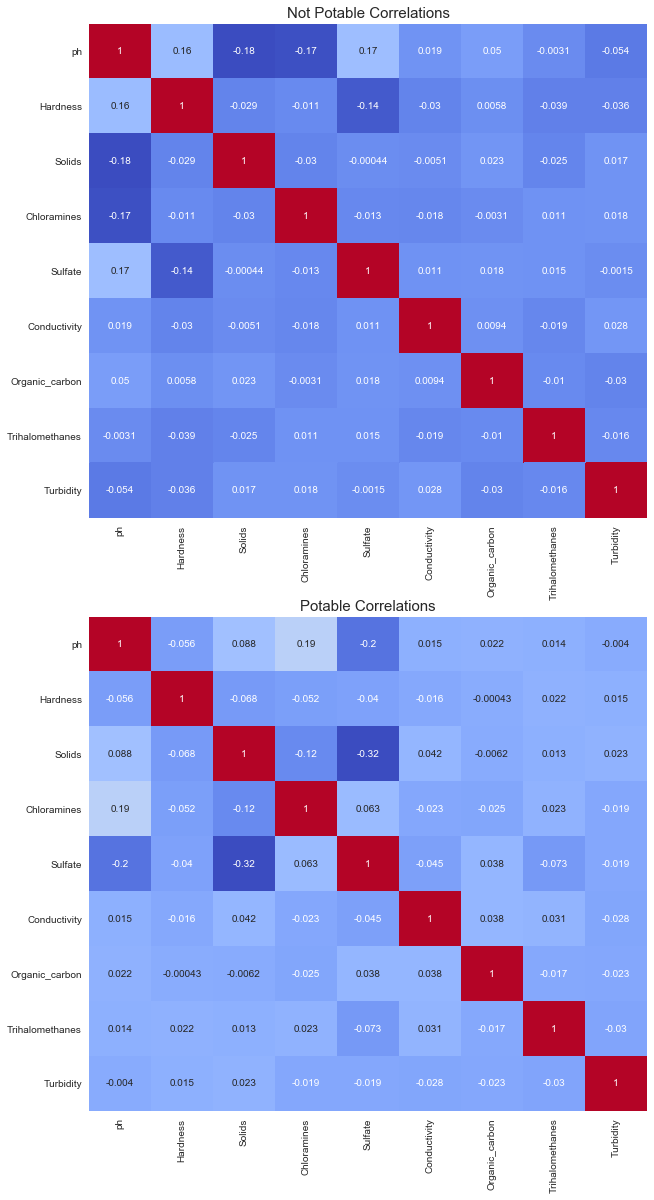

In [71]:
fig,ax = plt.subplots(2,1,figsize=(10,20))
df_1 = df[df['Potability'] == 1].drop('Potability',axis=1)
df_0 = df[df['Potability'] == 0].drop('Potability',axis=1)

sns.heatmap(df_0.corr(),cmap='coolwarm',annot=True,ax=ax[0],cbar=False)
ax[0].set_title('Not Potable Correlations',fontsize=15)
sns.heatmap(df_1.corr(),cmap='coolwarm',annot=True,ax=ax[1],cbar=False)
ax[1].set_title('Potable Correlations',fontsize=15)

In [72]:
df['Potability'] = df['Potability'].astype(str) 

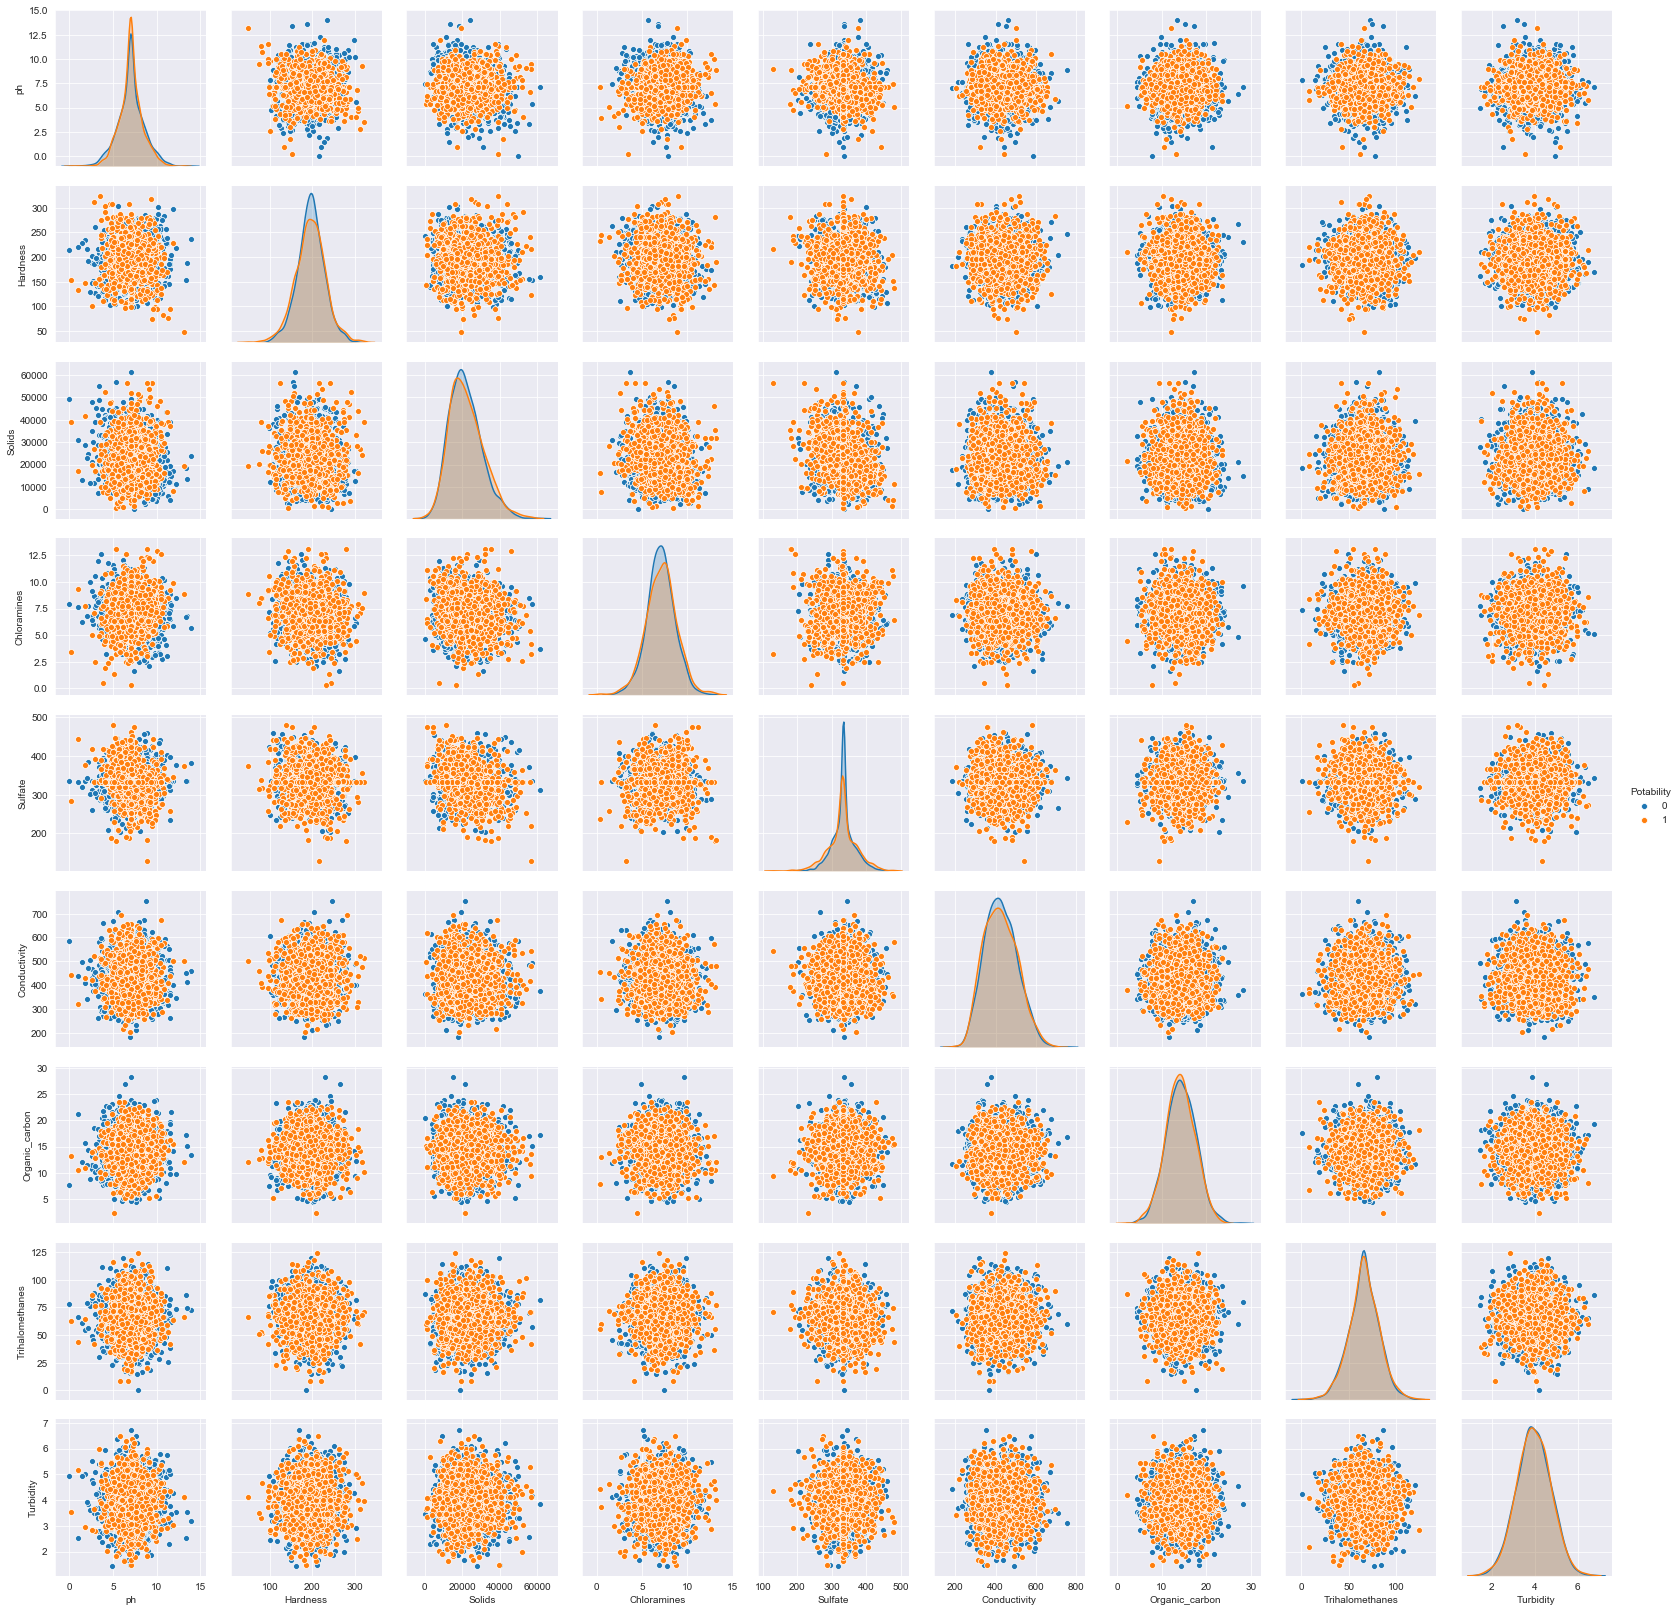

In [73]:
sns.pairplot(df,hue='Potability',vars=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'])

Neither our heatmaps nor pairplots show any indication of linear correlations between any of the features.

## Preparing Data for Model Building

We saw earlier in our exploration of the data that our dataset is unbalanced which is not an uncommon scenario when dealing with real world data. To ensure that our model will not incorrectly classify water potability based on a given set of features, we will need to use SMOTE (Synthetic Minority Oversampling Technique) to balance our data set.

In [74]:
from sklearn.model_selection import train_test_split

X = df.drop('Potability',axis=1)
y = df['Potability']

sm = SMOTE()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(f"Before SMOTE: {Counter(y_train)}")
X_train,y_train = sm.fit_resample(X_train,y_train)
print(f"After SMOTE: {Counter(y_train)}")

Before SMOTE: Counter({'0': 1603, '1': 1017})
After SMOTE: Counter({'0': 1603, '1': 1603})


Additionally, given that we are dealing with a classification problem, it is key that the algorithms used in our models are not hindered by unscaled data. Each feature is measured at different scales and fitting our unscaled data to our models will cause bias. These affects will be more apparent in our distance based (KNN,SVM) and gradient based (Logistic Regression) algorithms.

Based on our distribution plots, our features follow a Gaussian distribution, meaning we will be Standardizing our data as opposed to Normalizing.

In [75]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

### Model Selection

With our data scaled and balanced, we can now fit our data to some well-known classification algorithms and determine which model is the best predictor of water potability. 

- Logistic Regression (LR)

- Naive Bayes (NB)

- K-Nearest Neighbors (KNN)

- Decision Tree (DT)

- Random Forest (RF)

- Support Vector Machines (SVM)

In [76]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Lets begin by instantiating each of our models.

In [77]:
models = [
('LR',LogisticRegression(solver='lbfgs')),
('KNN',KNeighborsClassifier()),
('DT',DecisionTreeClassifier()),
('RF',RandomForestClassifier()),
('NB',GaussianNB()),
('SVM',SVC(gamma='auto'))]

To truly assess the predictive performance of our models, we will be making use of k-fold Cross-Validation. The main motivation behind this step is to ensure that our model performs well not only on the training set of data but also on the testing set. 

In [78]:
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10,random_state=7)

We will store our training and testing accuracy scores in separate lists and summarize in a table.

In [79]:
names = []
trainAccuracy = list()
testAccuracy = list()

In [80]:
for name,model in models:
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    trainAccuracy.append(cv_results.mean())
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    testResult = metrics.accuracy_score(y_test,y_pred)
    testAccuracy.append(testResult)
    names.append(name)

### Evaluation of Models

In [81]:
modelScore = pd.DataFrame({'Model' : names, 'Train_Accuracy' : trainAccuracy, 'Test_Accuracy' : testAccuracy})
modelScore.sort_values(by='Test_Accuracy',ascending=False,inplace=True)
modelScore

,Model,Train_Accuracy,Test_Accuracy
3,RF,0.747954,0.759146
2,DT,0.730814,0.708841
5,SVM,0.624755,0.620427
1,KNN,0.644780,0.553354
4,NB,0.493039,0.527439
0,LR,0.409134,0.487805


As noted above in our summary table, the RandomForestClassifier model appears to provide us with a higher train and test accuracy score. Even though we have achieved an accuracy score within industry standards, it does beg the question whether tuning our models will result in a better score or reveal a better candidate for our final model.

### Hyperparameter Tuning for Models

Rather than painstakingly testing different parameters one-by-one, we will make use of GridSearchCV. Before using this tool however, we will need to specify what parameters we would like to test for each of our models.

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
model_params = {
    
    'Logistic Regression' : {
        'model': models[0][1],
        'params': {
            'C': [1,5,10]
        }
    },
    
    'KNN':{
        'model': models[1][1],
        'params': {
            "n_neighbors" : list(range(1,31))  
        }
    },
    
    'Decision Tree' : {
        'model': models[2][1],
        'params': {
            "criterion":['gini','entropy'],
            "max_depth":range(1,20),
            "min_samples_leaf":range(1,10)
        }
    },
    
    'Random Forest': {
        'model': models[3][1],
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    
    'NB':{
        'model': models[4][1],
        'params': {
            "var_smoothing": np.logspace(0,-9, num=100)  
        }
    },
    
    'SVM': {
        'model': models[5][1],
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    }
    
}


With our parameter specified for each model, we are now ready to use GridSearchCV. The best score and parameter outputted from our grid search will be summarized into a table.

In [84]:
scores = []

for model_name, mp in model_params.items():
    grid  =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    grid.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df.sort_values(by='best_score',ascending=False,inplace=True)
df

,model,best_score,best_params
3,Random Forest,0.767311,{'n_estimators': 10}
2,Decision Tree,0.744541,"{'criterion': 'entropy', 'max_depth': 15, 'min..."
5,SVM,0.703369,"{'C': 10, 'kernel': 'rbf'}"
1,KNN,0.702745,{'n_neighbors': 1}
4,NB,0.560823,{'var_smoothing': 0.03511191734215131}
0,Logistic Regression,0.516532,{'C': 1}


Our RandomForestClassifier model still prevails as the better model even after conducting hyperparameter tuning. Lets take a look at the Confusion Matrix and Classification Report for this model.

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       395
           1       0.70      0.70      0.70       261

    accuracy                           0.76       656
   macro avg       0.75      0.75      0.75       656
weighted avg       0.76      0.76      0.76       656



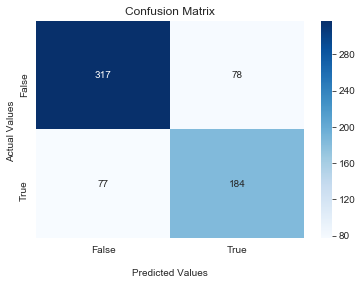

In [87]:
RF_best = RandomForestClassifier(n_estimators=10)
RF_best.fit(X_train,y_train)
y_pred = RF_best.predict(X_test)

print(classification_report(y_test, y_pred))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap='Blues',fmt='g')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

### Conclusion

It is clear that compared to the other classifiers that were tested, the most accurate model was our RandomForestClassifier with an overall accuracy of 76%.